In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [42]:
p = pd.read_csv('../pflib/data/charge-timein-2025-05-28-164957.csv')

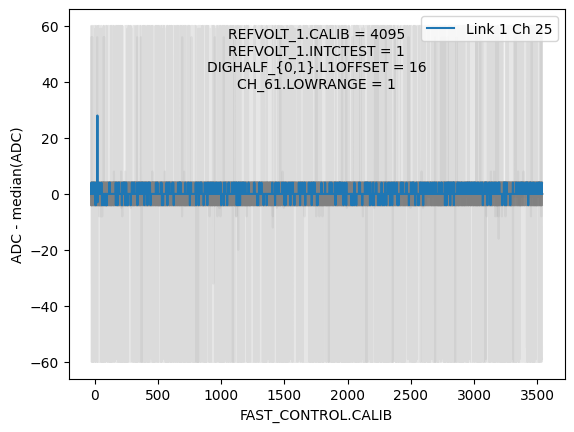

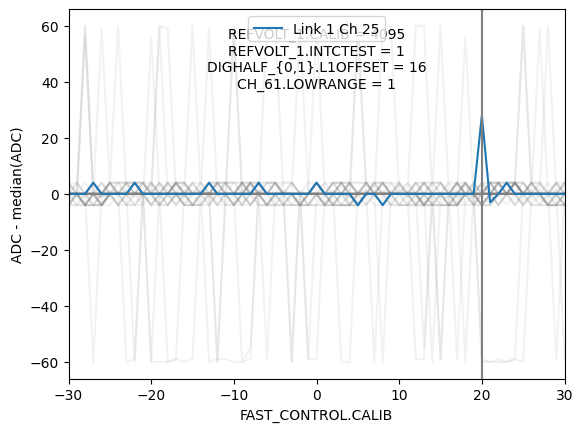

In [77]:
actual_range=list(range(-30,3539))

def single_channel(link, ch, **style):
    samples = p[(p.link==link)&(p.channel==str(ch))].adc.to_numpy()[:3569]
    plt.plot(actual_range, samples-np.median(samples), **style)

def plot():
    for link in range(2):
        for ch in range(1,36):
            single_channel(link, ch, color='gray', alpha=0.1)
    single_channel(1, 25, label='Link 1 Ch 25')
    plt.legend()
    plt.xlabel('FAST_CONTROL.CALIB')
    plt.ylabel('ADC - median(ADC)')
    plt.annotate(
        '\n'.join([
            'REFVOLT_1.CALIB = 4095',
            'REFVOLT_1.INTCTEST = 1',
            'DIGHALF_{0,1}.L1OFFSET = 16',
            'CH_61.LOWRANGE = 1'
        ]),
        xy=(0.5,0.95),
        xycoords='axes fraction',
        va='top', ha='center'
    )

plot()
plt.show()

plot()
plt.xlim(xmin=-30,xmax=30)
plt.axvline(20, color='gray')
plt.show()

In [80]:
# define a unique ID for each channel to make histograms a bit easier to make
p['uid'] = p['link'].astype(str)+'_'+p['channel']
import hist
def fill_and_plot_all_channels(
    xname, xlabel, xmin, xmax, rebin=1
):
    plt.figure(figsize=(20,10))
    (
        hist.Hist.new
        .StrCategory(p['uid'].unique(), label='Link_Channel')
        .Reg((xmax-xmin)//rebin,xmin,xmax, label=xlabel)
        .Double()
    ).fill(
        p['uid'],
        p[xname]
    ).plot2d(
        cmin=1,
        cbarsize=0.7
    )
    plt.xticks(rotation=90, size='x-small')
    plt.show()

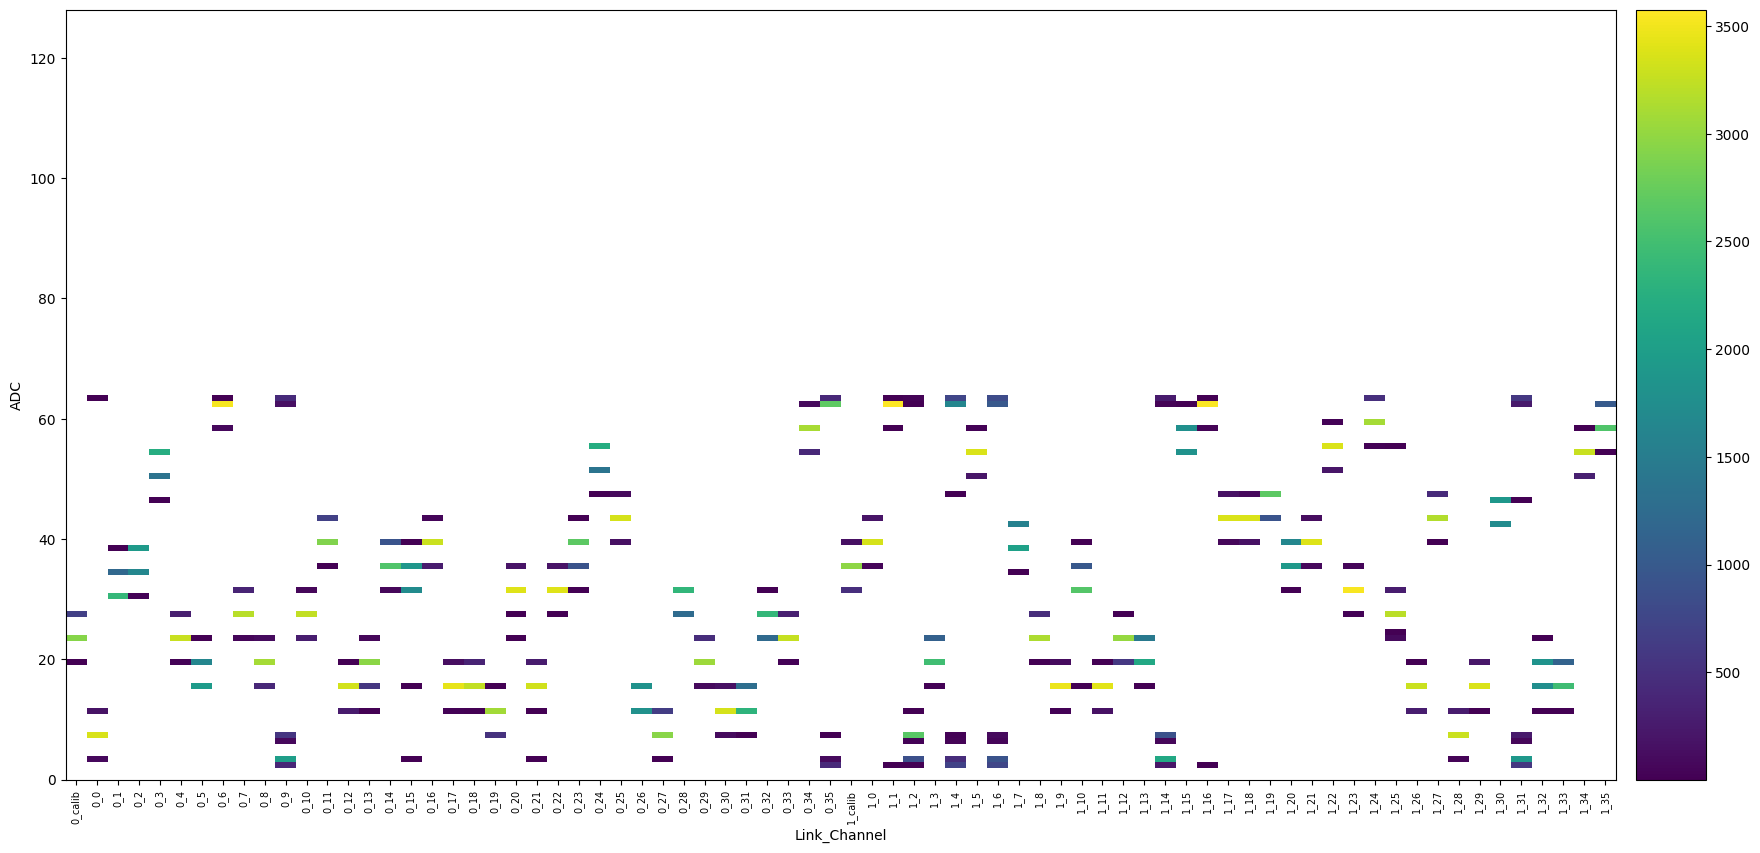

In [82]:
fill_and_plot_all_channels('adc', 'ADC', 0, 128)

(array([ 8.,  4., 11., 13., 35., 16.,  9.,  1.,  1.,  2.]),
 array([ 98. , 175.2, 252.4, 329.6, 406.8, 484. , 561.2, 638.4, 715.6,
        792.8, 870. ]),
 <BarContainer object of 10 artists>)

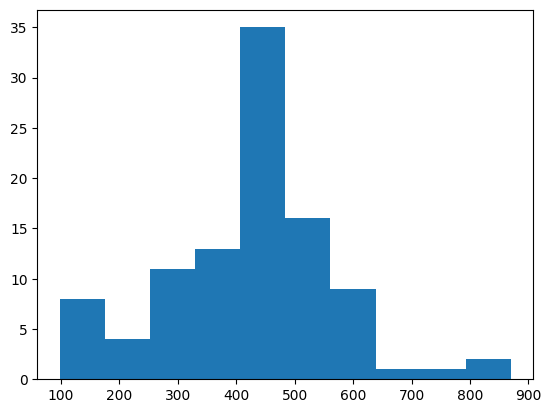

In [9]:
plt.hist(p[(p.link==0)&(p.channel=="0")].adc)